In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [14]:
df =pd.read_table('pima-indians-diabetes (1).data',sep =',',header =None,names =['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome'])

In [15]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [17]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

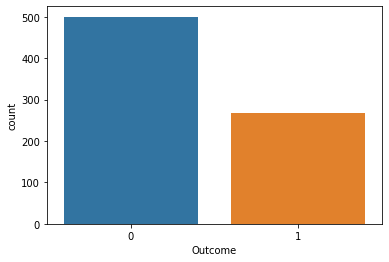

In [19]:
sns.countplot(df['Outcome'])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


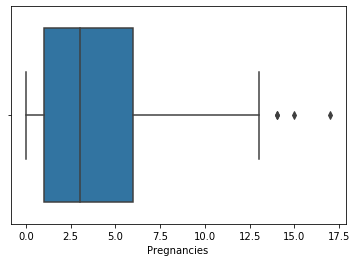

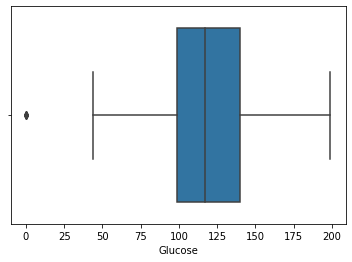

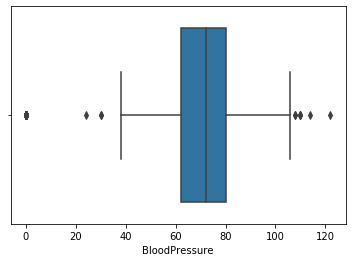

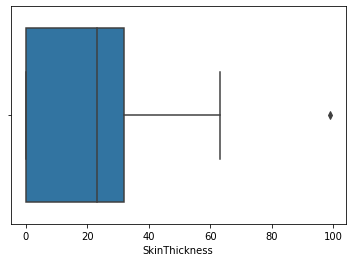

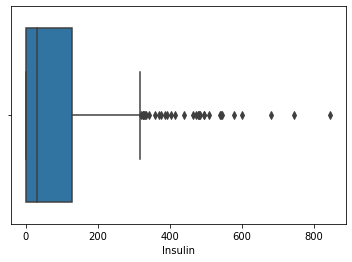

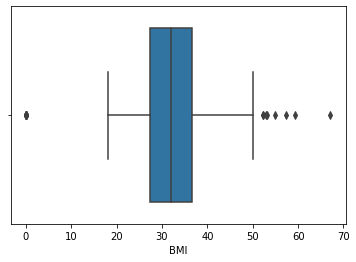

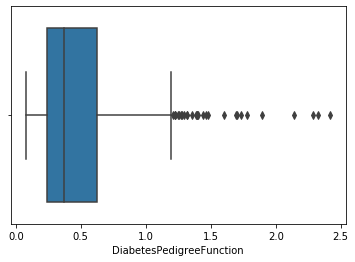

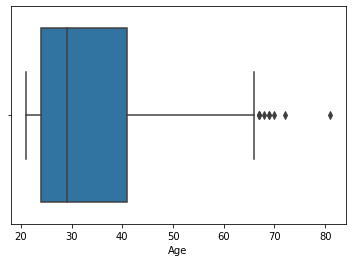

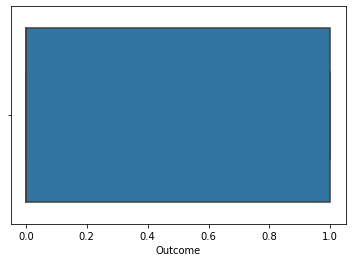

In [21]:
for j in df.columns:
    sns.boxplot(df[j])
    #df[j].plot(kind ='boxplot')
    plt.show()

In [24]:
x = df.drop(columns ='Outcome')
y = df['Outcome']

#Normalize the data

In [25]:
from sklearn.preprocessing import StandardScaler
st =StandardScaler()
xscaled =st.fit_transform(x)


# covariance matrix

In [28]:
cov_matrix = np.cov(xscaled.T)
print('Covariance Matrix \n%s', cov_matrix)
plt.tight_layout()

Covariance Matrix 
%s [[ 1.00130378  0.12962746  0.14146618 -0.08177826 -0.07363049  0.01770615
  -0.03356638  0.54505093]
 [ 0.12962746  1.00130378  0.15278853  0.05740263  0.33178913  0.2213593
   0.13751636  0.26385788]
 [ 0.14146618  0.15278853  1.00130378  0.2076409   0.08904933  0.2821727
   0.04131875  0.23984024]
 [-0.08177826  0.05740263  0.2076409   1.00130378  0.43735204  0.39308503
   0.18416737 -0.11411885]
 [-0.07363049  0.33178913  0.08904933  0.43735204  1.00130378  0.19811702
   0.18531222 -0.04221793]
 [ 0.01770615  0.2213593   0.2821727   0.39308503  0.19811702  1.00130378
   0.14083033  0.03628912]
 [-0.03356638  0.13751636  0.04131875  0.18416737  0.18531222  0.14083033
   1.00130378  0.03360507]
 [ 0.54505093  0.26385788  0.23984024 -0.11411885 -0.04221793  0.03628912
   0.03360507  1.00130378]]


<Figure size 432x288 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

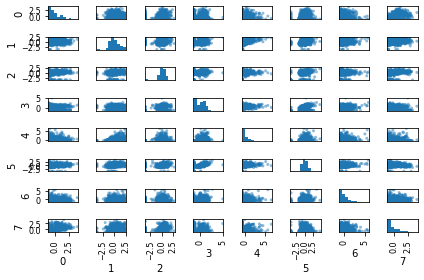

In [31]:
dffpiar =pd.DataFrame(xscaled)
plt.figure(figsize=(20,8))
axes =pd.plotting.scatter_matrix(dffpiar)
plt.tight_layout()

# Step 3: Calculate the eigenvalues and eigenvectors

In [32]:
eig_val ,eigvect = np.linalg.eig(cov_matrix)

In [34]:
print('Eigen Vectors \n%s', eig_val)
print('\n Eigen Values \n%s', eigvect)

Eigen Vectors 
%s [2.09711056 1.73346726 0.42036353 0.40498938 0.68351839 0.76333832
 0.87667054 1.03097228]

 Eigen Values 
%s [[-0.1284321  -0.59378583 -0.58879003  0.11784098 -0.19359817  0.47560573
  -0.08069115  0.01308692]
 [-0.39308257 -0.17402908 -0.06015291  0.45035526 -0.09416176 -0.46632804
   0.40432871 -0.46792282]
 [-0.36000261 -0.18389207 -0.19211793 -0.01129554  0.6341159  -0.32795306
  -0.05598649  0.53549442]
 [-0.43982428  0.33196534  0.28221253  0.5662838  -0.00958944  0.48786206
  -0.03797608  0.2376738 ]
 [-0.43502617  0.25078106 -0.13200992 -0.54862138  0.27065061  0.34693481
   0.34994376 -0.33670893]
 [-0.45194134  0.1009598  -0.03536644 -0.34151764 -0.68537218 -0.25320376
  -0.05364595  0.36186463]
 [-0.27061144  0.122069   -0.08609107 -0.00825873  0.08578409 -0.11981049
  -0.8336801  -0.43318905]
 [-0.19802707 -0.62058853  0.71208542 -0.21166198  0.03335717  0.10928996
  -0.0712006  -0.07524755]]


# variance

In [37]:
tot = sum(eig_val)
var_exp = [( i /tot ) * 100 for i in sorted(eig_val, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 26.17974932  47.81987607  60.69024944  71.63436249  81.16366731
  89.69652215  94.9442244  100.        ]


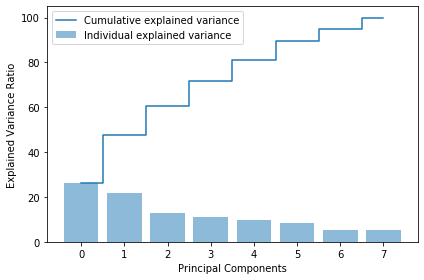

In [39]:
plt.figure(figsize=(6 , 4))
plt.bar(range(8), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(8), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [86]:
ppp.T

array([[ 0.16407332, -1.86901393, -1.68532891, ..., -0.33854635,
        -1.83455119, -0.25437326],
       [-1.43105348, -1.5126246 ,  1.2336948 , ...,  1.28823195,
        -0.16509043, -1.29106356],
       [ 0.72010355, -0.51879332,  0.06847805, ...,  0.16077746,
         0.03511704, -0.46270512],
       ...,
       [-1.86070834, -0.80062216, -0.7690268 , ...,  0.50333099,
        -2.52345136,  0.98735282],
       [ 1.74606209,  0.88298357,  0.81445819, ..., -0.81104604,
         0.97980043, -1.4410684 ],
       [ 1.38589031,  0.24593221, -0.51911171, ..., -1.66065995,
         0.53991529,  0.51358634]])

In [87]:
xtrainpca

array([[ 1.03685663e-01,  1.86577666e+00,  4.11568270e-01, ...,
        -1.18137189e+00, -1.55056677e+00,  8.69740850e-01],
       [ 1.67925200e+00,  1.37720431e+00,  9.15274699e-01, ...,
         1.01603473e-01,  1.03592811e+00, -6.39736373e-01],
       [-6.24978901e-01,  6.14468807e-01,  6.71862582e-01, ...,
        -8.24430098e-01, -2.46892096e-03,  7.65142989e-03],
       ...,
       [ 1.85417028e+00,  5.24258033e-01, -1.46750218e+00, ...,
         6.51742588e-01, -6.34952007e-01,  3.01519761e-01],
       [-1.65133362e+00, -7.16522279e-01,  1.26167088e+00, ...,
         3.48232092e+00,  1.13560469e+00, -4.29271102e-02],
       [-1.47174115e+00, -3.56976755e-02,  1.44876567e-01, ...,
        -1.64649134e+00, -6.20588529e-01,  1.52724945e-01]])

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(xscaled, y, test_size=0.33, random_state=42)

In [1]:
from sklearn.decomposition import PCA

pca =PCA()
xtrainpca = pca.fit_transform(X_train)
xtestpca = pca.transform(X_test)

NameError: name 'X_train' is not defined

In [77]:
xtrainpca

array([[ 1.03685663e-01,  1.86577666e+00,  4.11568270e-01, ...,
        -1.18137189e+00, -1.55056677e+00,  8.69740850e-01],
       [ 1.67925200e+00,  1.37720431e+00,  9.15274699e-01, ...,
         1.01603473e-01,  1.03592811e+00, -6.39736373e-01],
       [-6.24978901e-01,  6.14468807e-01,  6.71862582e-01, ...,
        -8.24430098e-01, -2.46892096e-03,  7.65142989e-03],
       ...,
       [ 1.85417028e+00,  5.24258033e-01, -1.46750218e+00, ...,
         6.51742588e-01, -6.34952007e-01,  3.01519761e-01],
       [-1.65133362e+00, -7.16522279e-01,  1.26167088e+00, ...,
         3.48232092e+00,  1.13560469e+00, -4.29271102e-02],
       [-1.47174115e+00, -3.56976755e-02,  1.44876567e-01, ...,
        -1.64649134e+00, -6.20588529e-01,  1.52724945e-01]])

In [55]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier().fit(xtrainpca,y_train)

In [56]:
ytestpred = dt.predict(xtestpca)

In [57]:
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve,classification_report

In [58]:
accuracy_score(ytestpred,y_test)

0.6732283464566929

In [2]:
X =  [123, 435, 564 ]
import numpy as np
np.var(X)

34274.0